In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../DATA/cleaned_housing_data.csv')

In [3]:
df.head()

,Unnamed: 0,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,Owner,0,0,2,BHK,1300.24,1,1,"Ksfc Layout,Bangalore",77.60,12.97,55.0
1,1,Dealer,0,0,2,BHK,1275.00,1,1,"Vishweshwara Nagar,Mysore",76.64,12.27,51.0
2,2,Owner,0,0,2,BHK,933.16,1,1,"Jigani,Bangalore",77.63,12.78,43.0
3,3,Owner,0,1,2,BHK,929.92,1,1,"Sector-1 Vaishali,Ghaziabad",77.34,28.64,62.5
4,4,Dealer,1,0,2,BHK,999.01,0,1,"New Town,Kolkata",88.48,22.59,60.5


In [4]:
df.isnull().sum()

Unnamed: 0               0
POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

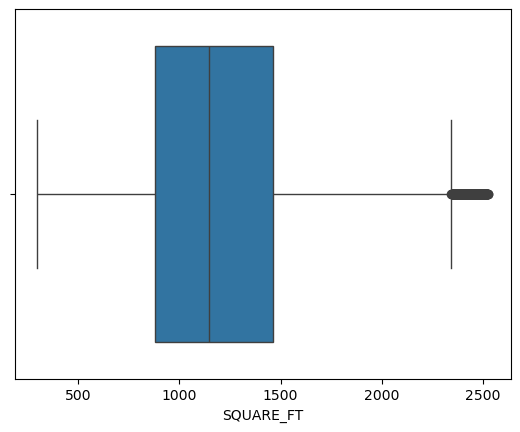

In [6]:
import seaborn as sns
sns.boxplot(x=df['SQUARE_FT'])
plt.show()

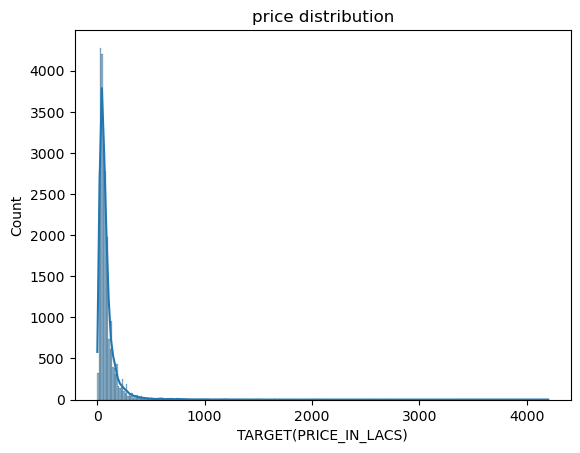

In [7]:
sns.histplot(df['TARGET(PRICE_IN_LACS)'],kde=True)
plt.title('price distribution')
plt.show()

In [8]:
df['TARGET(PRICE_IN_LACS)'].skew()

np.float64(8.694919853205937)

In [9]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['transformed_price'] = pt.fit_transform(df[['TARGET(PRICE_IN_LACS)']])


In [10]:
df['transformed_price']

0       -0.090412
1       -0.193468
2       -0.430344
3        0.081580
4        0.038118
           ...   
27098   -0.532413
27099   -0.366689
27100   -1.098674
27101    0.173814
27102   -1.060735
Name: transformed_price, Length: 27103, dtype: float64

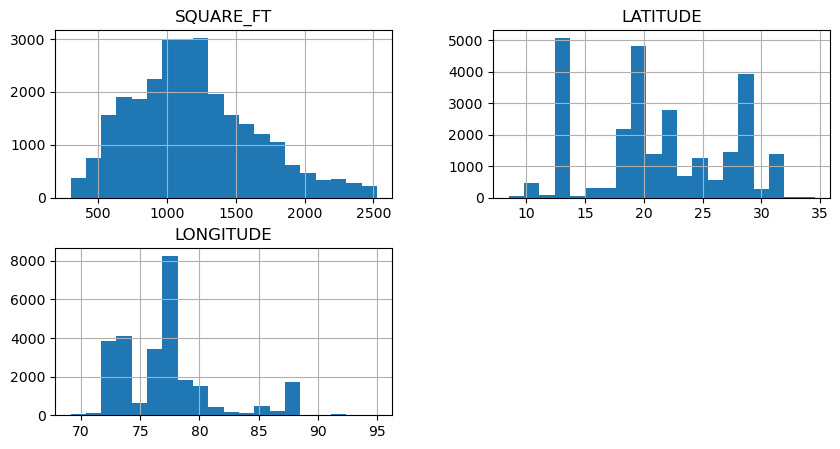

In [11]:
numeric_cols = ['SQUARE_FT', 'LATITUDE', 'LONGITUDE']
df[numeric_cols].hist(bins=20, figsize=(10,5))
plt.show()

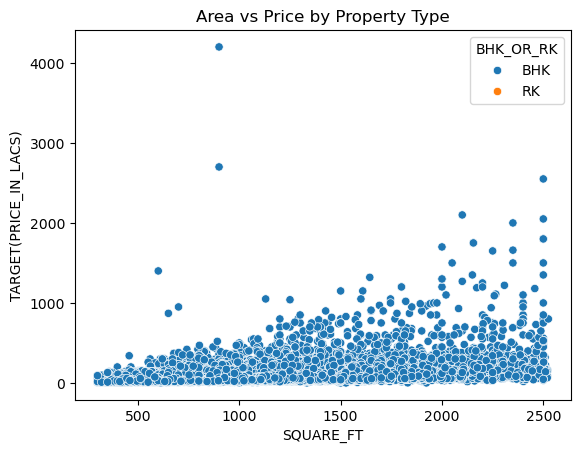

In [12]:
sns.scatterplot(data=df, x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)', hue='BHK_OR_RK')
plt.title('Area vs Price by Property Type')
plt.show()

In [13]:
corr = df['SQUARE_FT'].corr(df['TARGET(PRICE_IN_LACS)'])
print(f"Correlation: {corr:.2f}")

Correlation: 0.34


In [14]:
Q1 = df[['SQUARE_FT', 'TARGET(PRICE_IN_LACS)']].quantile(0.25)
Q3 = df[['SQUARE_FT', 'TARGET(PRICE_IN_LACS)']].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[['SQUARE_FT', 'TARGET(PRICE_IN_LACS)']] < (Q1 - 1.5 * IQR)) | (df[['SQUARE_FT', 'TARGET(PRICE_IN_LACS)']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("New correlation:", df_no_outliers['SQUARE_FT'].corr(df_no_outliers['TARGET(PRICE_IN_LACS)']))

New correlation: 0.4252807101957819


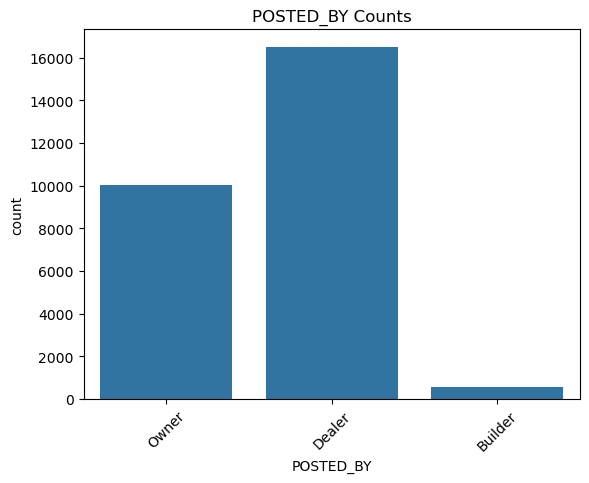

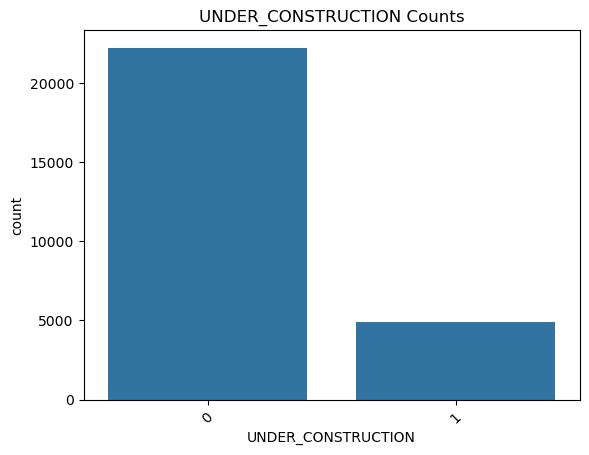

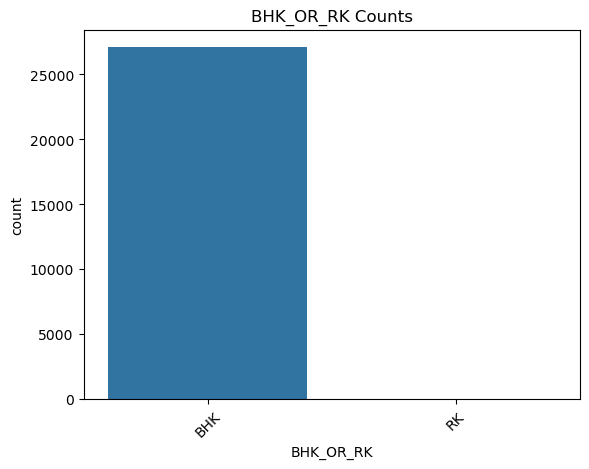

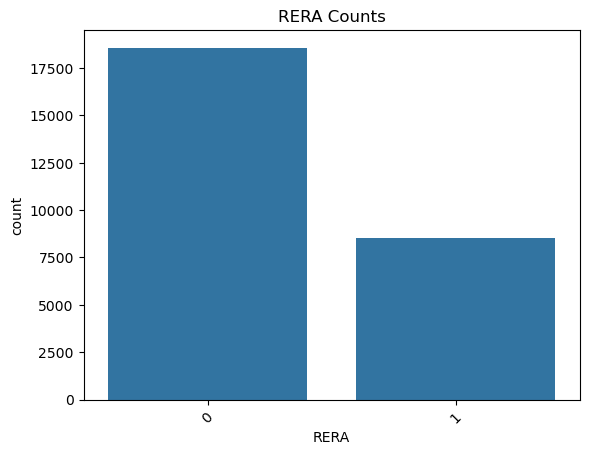

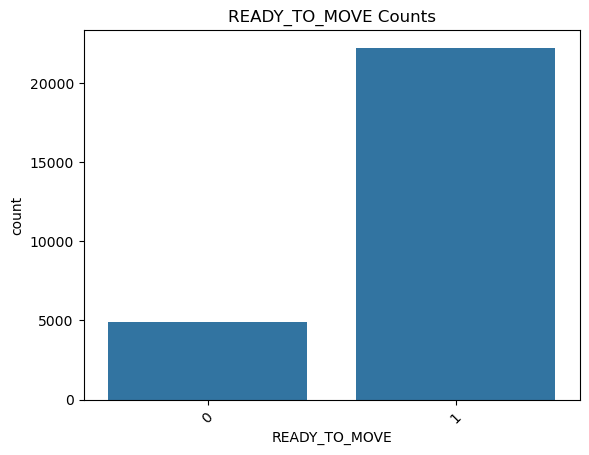

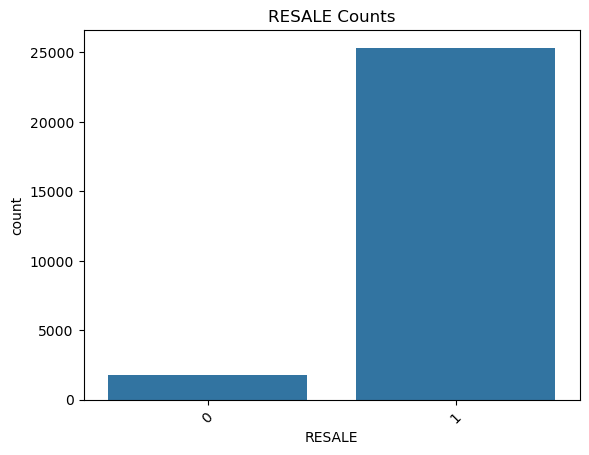

In [15]:
categorical_cols = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'BHK_OR_RK', 'RERA', 'READY_TO_MOVE', 'RESALE']

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Counts')
    plt.xticks(rotation=45)
    plt.show()


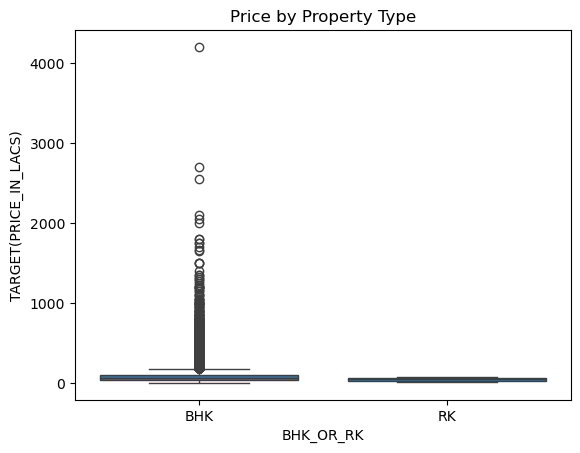

In [16]:
sns.boxplot(data=df, x='BHK_OR_RK', y='TARGET(PRICE_IN_LACS)')
plt.title('Price by Property Type')
plt.show()

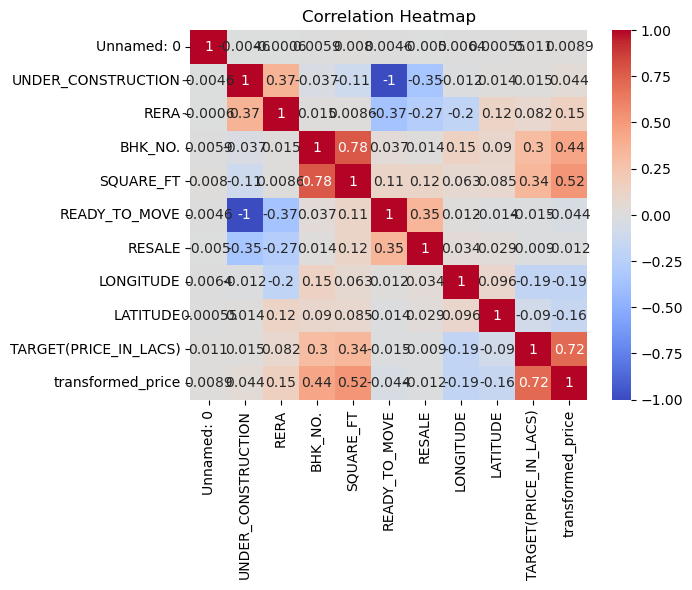

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature enginerring

In [61]:
df_no_outliers = df.copy()

In [62]:
## price for square root
df_no_outliers['PRICE_PER_SQFT'] = df_no_outliers['TARGET(PRICE_IN_LACS)'] / df_no_outliers['SQUARE_FT']


In [63]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['POSTED_BY', 'BHK_OR_RK', 'RERA', 'READY_TO_MOVE', 'RESALE']

for col in categorical_cols:
    le = LabelEncoder()
    le.fit_transform(df_no_outliers[col])

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(df_no_outliers[['SQUARE_FT', 'PRICE_PER_SQFT']])


array([[ 0.24176363, -0.3800655 ],
       [ 0.18532327, -0.40982934],
       [-0.57908138, -0.33114544],
       ...,
       [-0.3789909 , -0.58453854],
       [-0.59267715,  0.00779056],
       [-0.66045478, -0.5263006 ]], shape=(27103, 2))

In [65]:
X = df_no_outliers.drop(['TARGET(PRICE_IN_LACS)', 'ADDRESS'], axis=1)
y=df_no_outliers['TARGET(PRICE_IN_LACS)']


In [66]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [67]:
model.fit(X_encoded, y)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
X = df_no_outliers.drop(['TARGET(PRICE_IN_LACS)', 'ADDRESS'], axis=1)  # Drop address column
y = df_no_outliers['TARGET(PRICE_IN_LACS)']


for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

##Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

##Feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

transformed_price     9.861273e-01
PRICE_PER_SQFT        6.908777e-03
Unnamed: 0            2.970109e-03
LATITUDE              2.939423e-03
SQUARE_FT             3.628584e-04
POSTED_BY             3.093741e-04
LONGITUDE             2.736940e-04
BHK_NO.               1.022193e-04
RERA                  4.657945e-06
UNDER_CONSTRUCTION    8.517626e-07
READY_TO_MOVE         3.760804e-07
RESALE                3.659260e-07
BHK_OR_RK             1.444438e-12
dtype: float64


In [69]:
df_no_outliers.drop(columns=['BHK_OR_RK','RESALE','UNDER_CONSTRUCTION'],axis=1,inplace=True)

In [70]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features:", high_corr)

Highly correlated features: ['READY_TO_MOVE']


In [71]:
df_no_outliers.drop(['READY_TO_MOVE'],axis=1,inplace=True)

In [72]:
df_no_outliers['POSTED_BY'].value_counts()

POSTED_BY
Dealer     16503
Owner      10023
Builder      577
Name: count, dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_fe = df_no_outliers.copy()


df_fe['PRICE_PER_SQFT'] = df_fe['TARGET(PRICE_IN_LACS)'] / df_fe['SQUARE_FT']
df_fe['LAT_ROUNDED'] = df_fe['LATITUDE'].round(2)
df_fe['LONG_ROUNDED'] = df_fe['LONGITUDE'].round(2)


X = df_fe.drop(['TARGET(PRICE_IN_LACS)', 'ADDRESS'], axis=1)
y = df_fe['TARGET(PRICE_IN_LACS)']


for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

numeric_cols = ['SQUARE_FT', 'PRICE_PER_SQFT', 'LATITUDE', 'LONGITUDE']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("Feature engineering complete.")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Feature engineering complete.
X shape: (27103, 11), y shape: (27103,)


In [78]:
df_fe.to_csv('../DATA/feature_enginerring_complete.csv')

In [75]:
df.head()

,Unnamed: 0,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),transformed_price
0,0,Owner,0,0,2,BHK,1300.24,1,1,"Ksfc Layout,Bangalore",77.60,12.97,55.0,-0.090412
1,1,Dealer,0,0,2,BHK,1275.00,1,1,"Vishweshwara Nagar,Mysore",76.64,12.27,51.0,-0.193468
2,2,Owner,0,0,2,BHK,933.16,1,1,"Jigani,Bangalore",77.63,12.78,43.0,-0.430344
3,3,Owner,0,1,2,BHK,929.92,1,1,"Sector-1 Vaishali,Ghaziabad",77.34,28.64,62.5,0.081580
4,4,Dealer,1,0,2,BHK,999.01,0,1,"New Town,Kolkata",88.48,22.59,60.5,0.038118


In [76]:
df_fe.head()

,Unnamed: 0,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),transformed_price,PRICE_PER_SQFT,LAT_ROUNDED,LONG_ROUNDED
0,0,Owner,0,2,1300.24,"Ksfc Layout,Bangalore",77.60,12.97,55.0,-0.090412,0.04230,12.97,77.60
1,1,Dealer,0,2,1275.00,"Vishweshwara Nagar,Mysore",76.64,12.27,51.0,-0.193468,0.04000,12.27,76.64
2,2,Owner,0,2,933.16,"Jigani,Bangalore",77.63,12.78,43.0,-0.430344,0.04608,12.78,77.63
3,3,Owner,1,2,929.92,"Sector-1 Vaishali,Ghaziabad",77.34,28.64,62.5,0.081580,0.06721,28.64,77.34
4,4,Dealer,0,2,999.01,"New Town,Kolkata",88.48,22.59,60.5,0.038118,0.06056,22.59,88.48


In [77]:
df_no_outliers.head()

,Unnamed: 0,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),transformed_price,PRICE_PER_SQFT
0,0,Owner,0,2,1300.24,"Ksfc Layout,Bangalore",77.60,12.97,55.0,-0.090412,0.04230
1,1,Dealer,0,2,1275.00,"Vishweshwara Nagar,Mysore",76.64,12.27,51.0,-0.193468,0.04000
2,2,Owner,0,2,933.16,"Jigani,Bangalore",77.63,12.78,43.0,-0.430344,0.04608
3,3,Owner,1,2,929.92,"Sector-1 Vaishali,Ghaziabad",77.34,28.64,62.5,0.081580,0.06721
4,4,Dealer,0,2,999.01,"New Town,Kolkata",88.48,22.59,60.5,0.038118,0.06056
